In [1]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

project_path = os.path.abspath("Developer/rag_trust")
if project_path not in sys.path:
    sys.path.append(project_path)

from classes.utils import Utils
from classes.config import Config
from classes.charts import Charts
utils = Utils()
custom_factuality_weights = {
    'is_correct': 0.5,  # LLM SCORE
    'score': 0.2, # FAKE OVERLAP
    'meteor': 0.3 # METEOR
}

custom_robustness_weights = {
    'is_correct': 0.6, # LLM SCORE
    'similarity_score': 0.2, # COSINE SIMILARITY
    'f1_score': 0.2 # F1
}

charts = Charts(
    factuality_weights=custom_factuality_weights,
    robustness_weights=custom_robustness_weights
)
#custom_path = "/Users/carlofalchi/Developer/rag_trust/results/results_20260210_225903_w_data_20260210_204526.json"
custom_path = "/Users/carlofalchi/Developer/rag_trust/results/results_20260213_211528_w_data_20260213_203716.json"

results = utils.load(custom_path) 
df = charts.analyze_results(results)  
charts.print_summary()

Models evaluated: ['granite4:3b', 'llama3.1:8b', 'ministral-3:14b', 'mistral-small3.2:24b', 'qwen3:30b-instruct']

========== FACTUALITY EXPERIMENT ==========

Factuality Score:
Input      Strategy            granite4:3b     llama3.1:8b ministral-3:14b mistral-small3.2:24b qwen3:30b-instruct
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────
0%         baseline                  68.4%           75.0%           68.6%           69.9%           70.4%
0%         critical                  72.7%           74.8%           77.1%           78.1%           79.6%
0%         hedge                     64.6%           73.1%           83.6%           89.8%           73.9%
0%         verify                    74.4%           76.2%           79.1%           76.4%           77.6%
30%        baseline                  29.1%           36.1%           46.5%           42.2%           46.7%
30%        critical                  34.1%           32.7

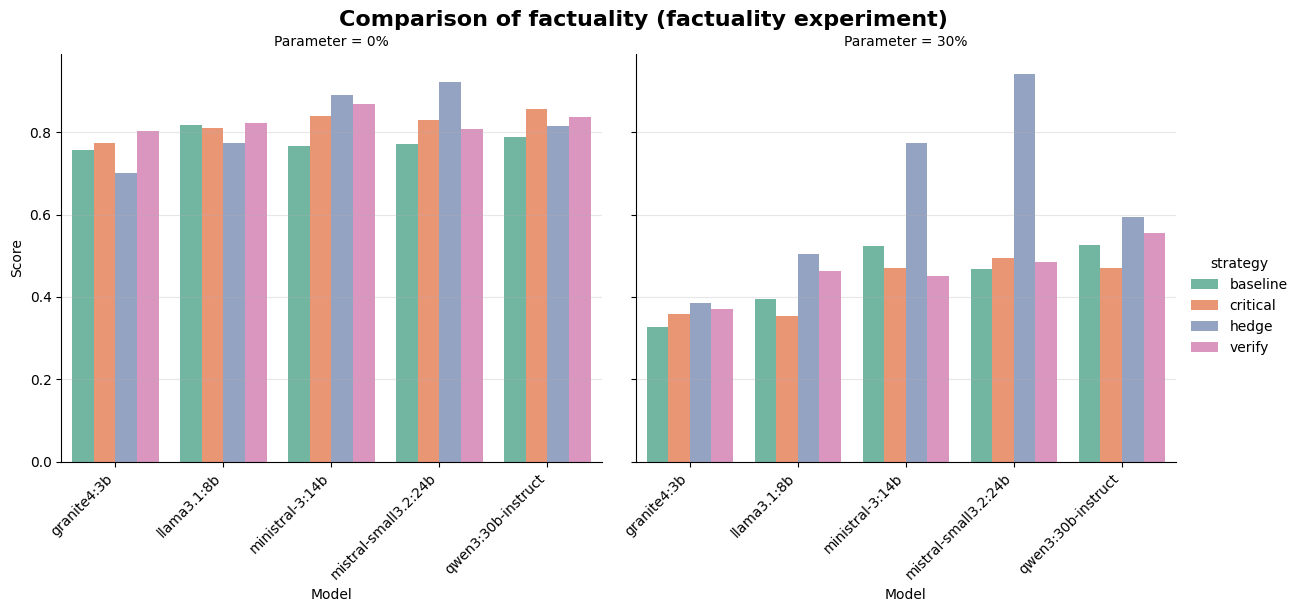

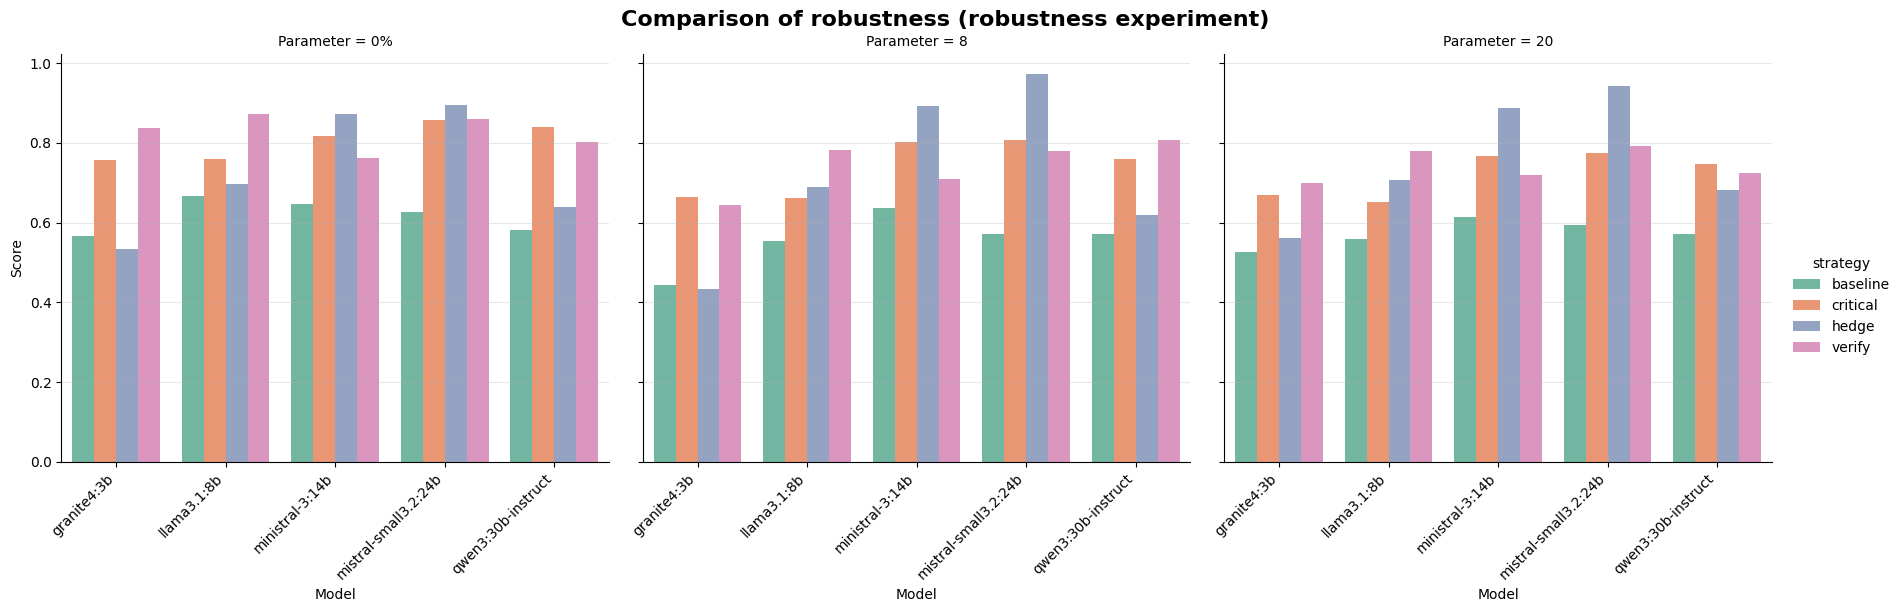

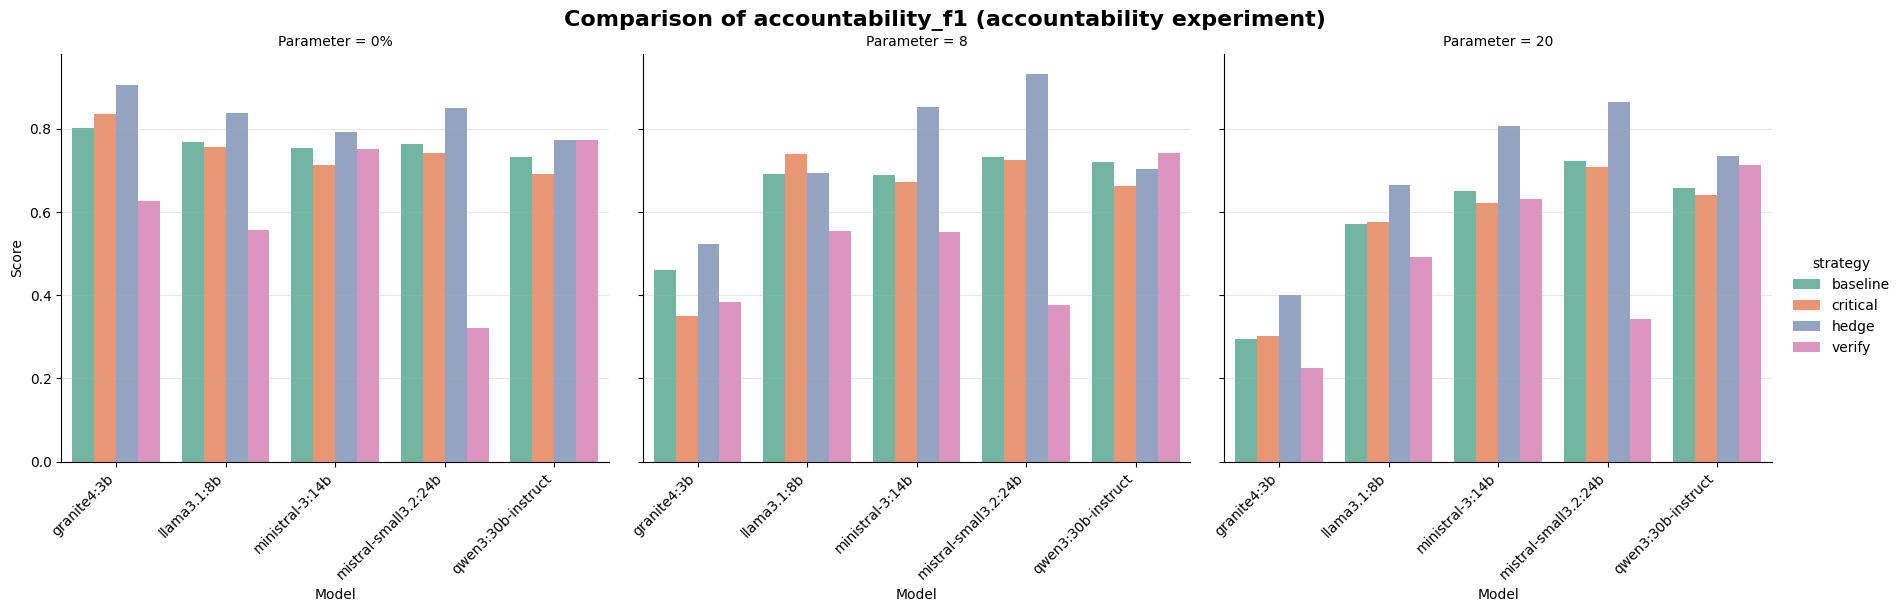

In [3]:
# Plot factuality scores
charts.plot_metric_barchart('factuality', experiment_type='factuality')

# Plot robustness scores
charts.plot_metric_barchart('robustness', experiment_type='robustness')

# Plot accountability F1
charts.plot_metric_barchart('accountability_f1', experiment_type='accountability')

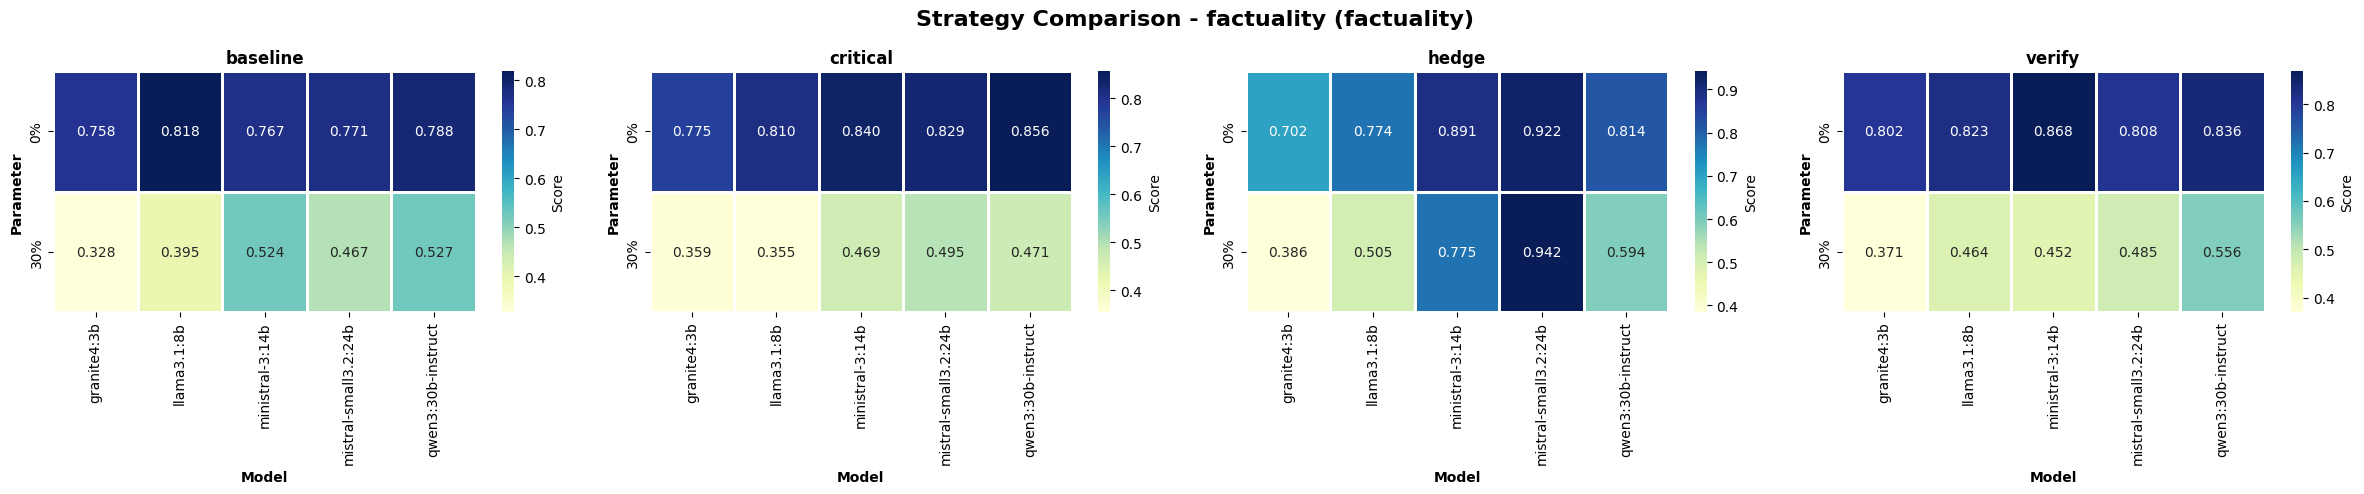

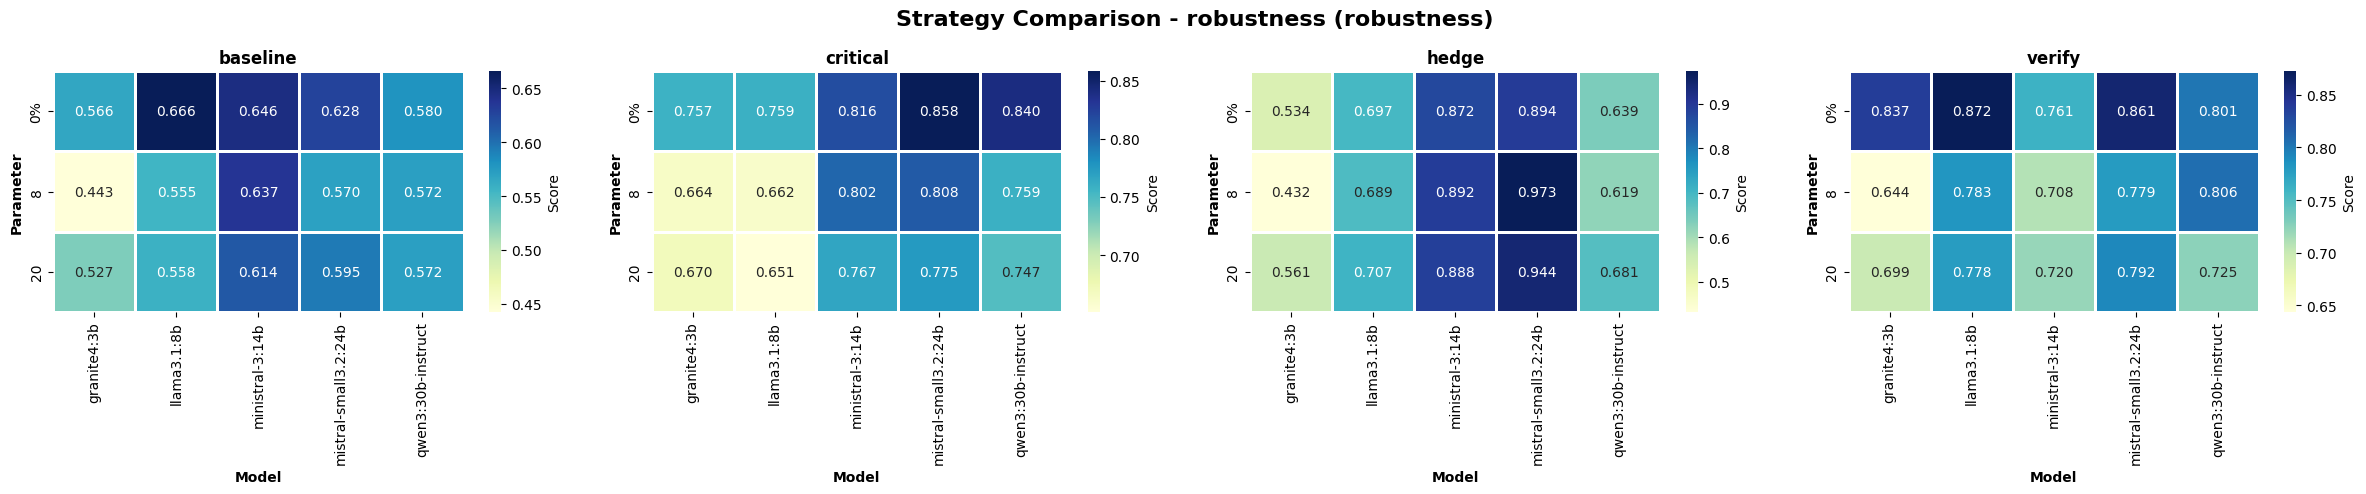

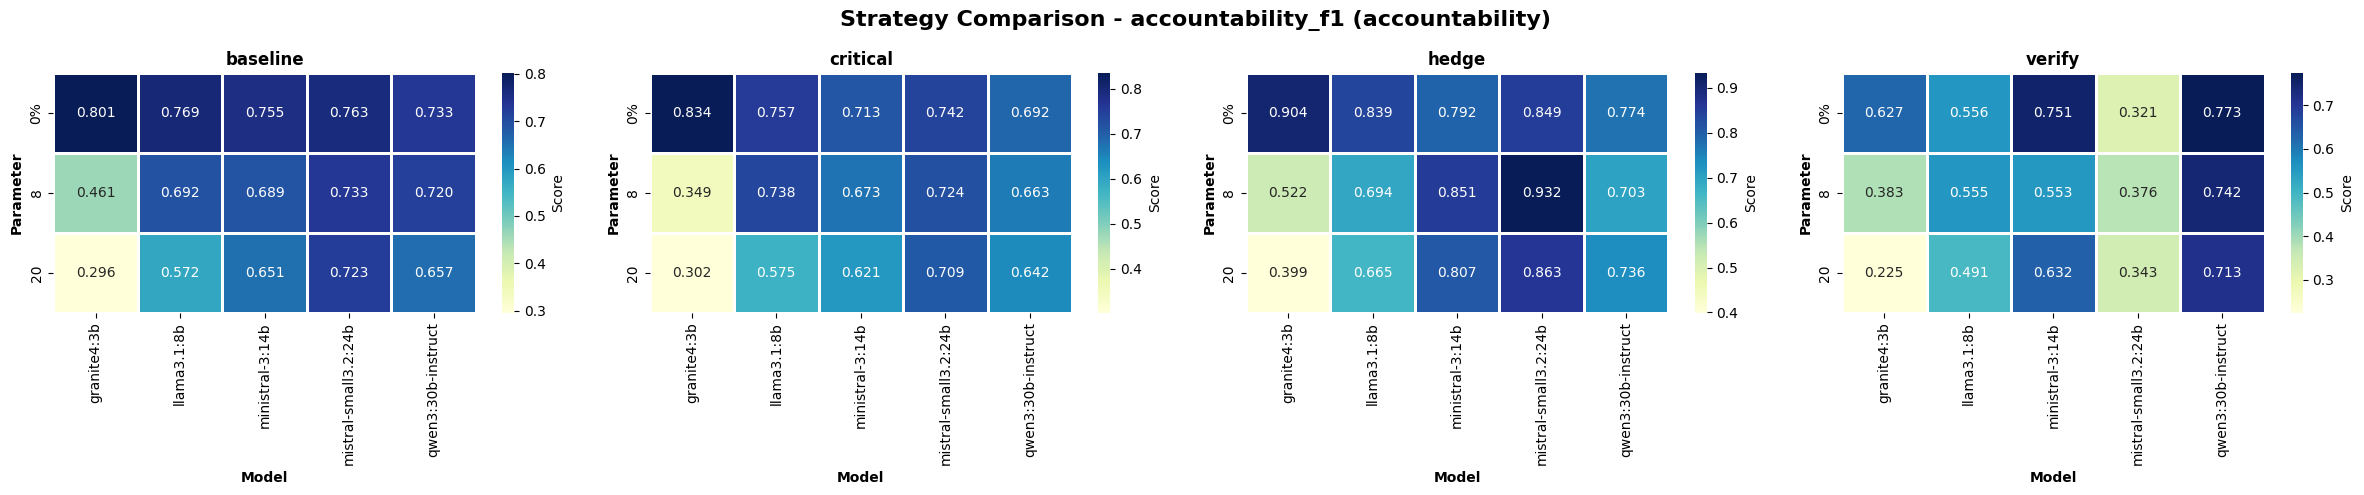

In [4]:
# Compare strategies for factuality
charts.plot_strategy_comparison('factuality', experiment_type='factuality')

# Compare strategies for factuality
charts.plot_strategy_comparison('robustness', experiment_type='robustness')

# Compare strategies for accountability
charts.plot_strategy_comparison('accountability_f1', experiment_type='accountability')

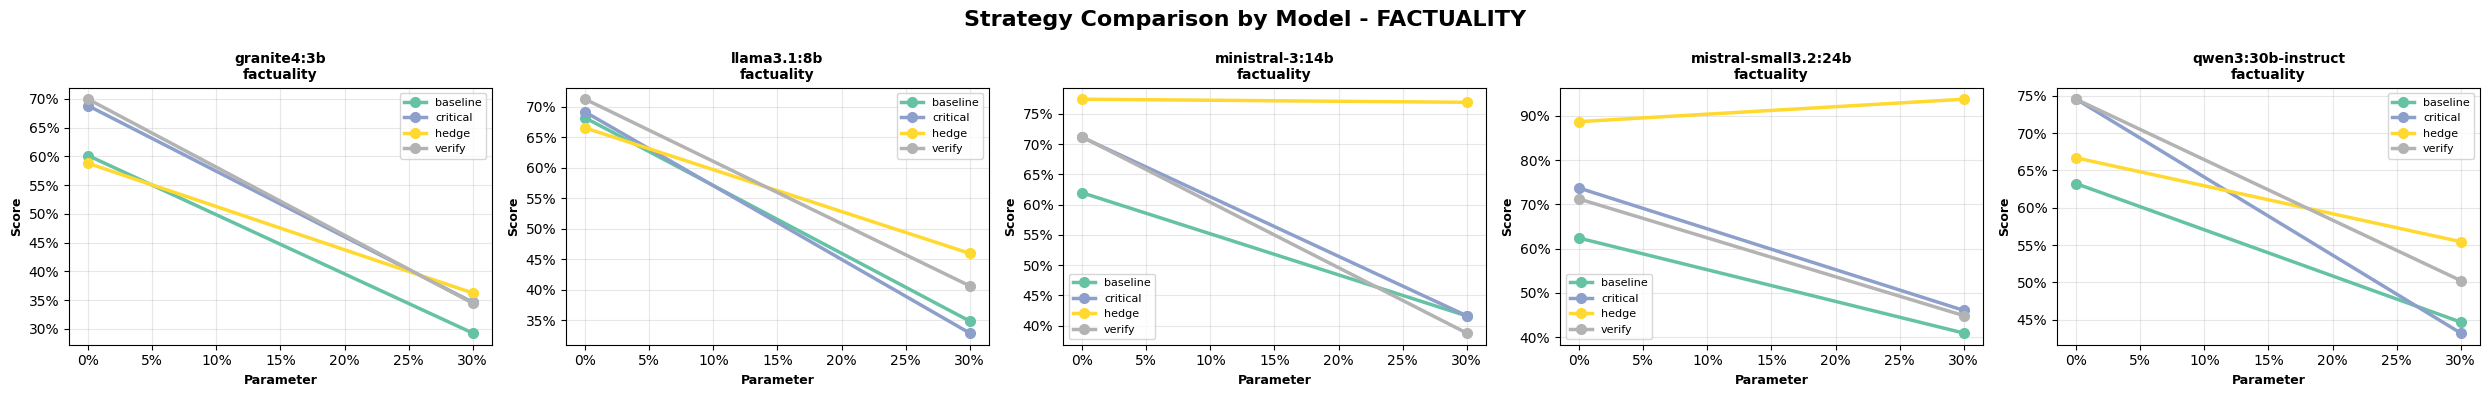

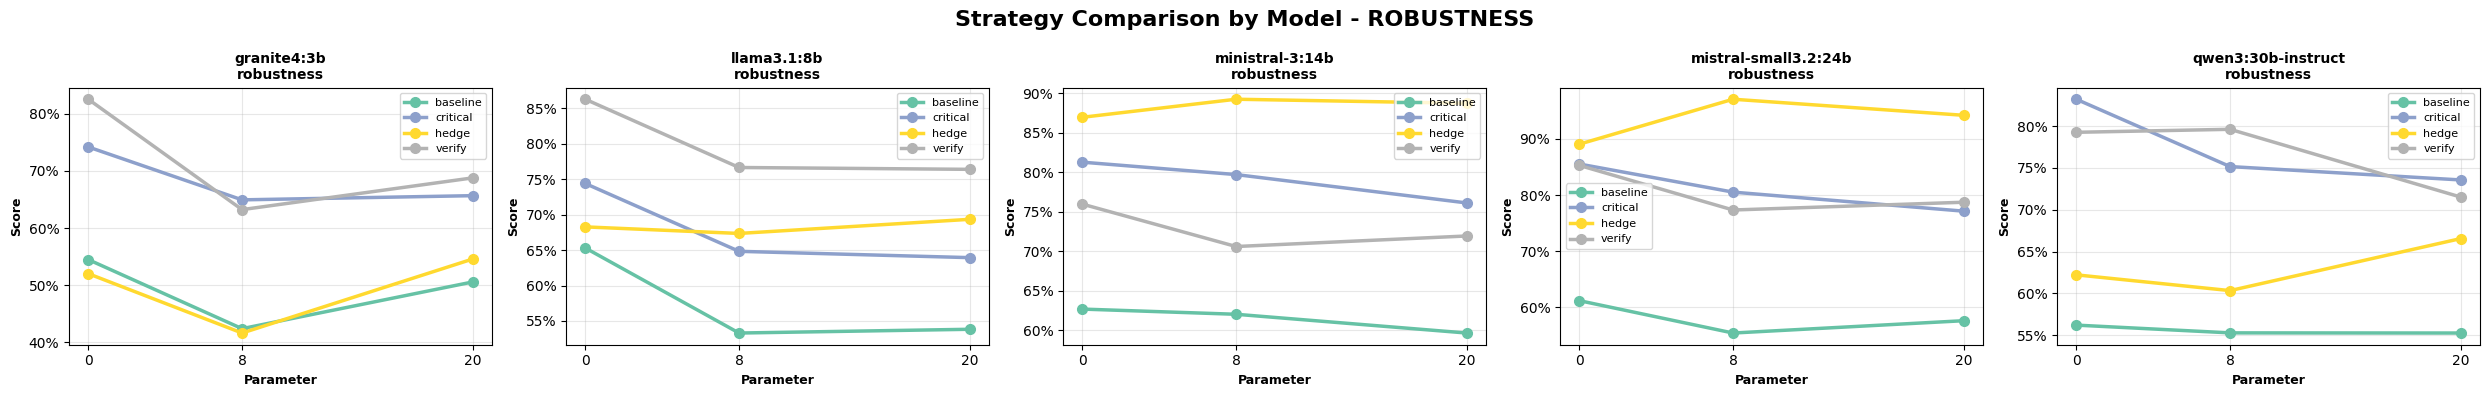

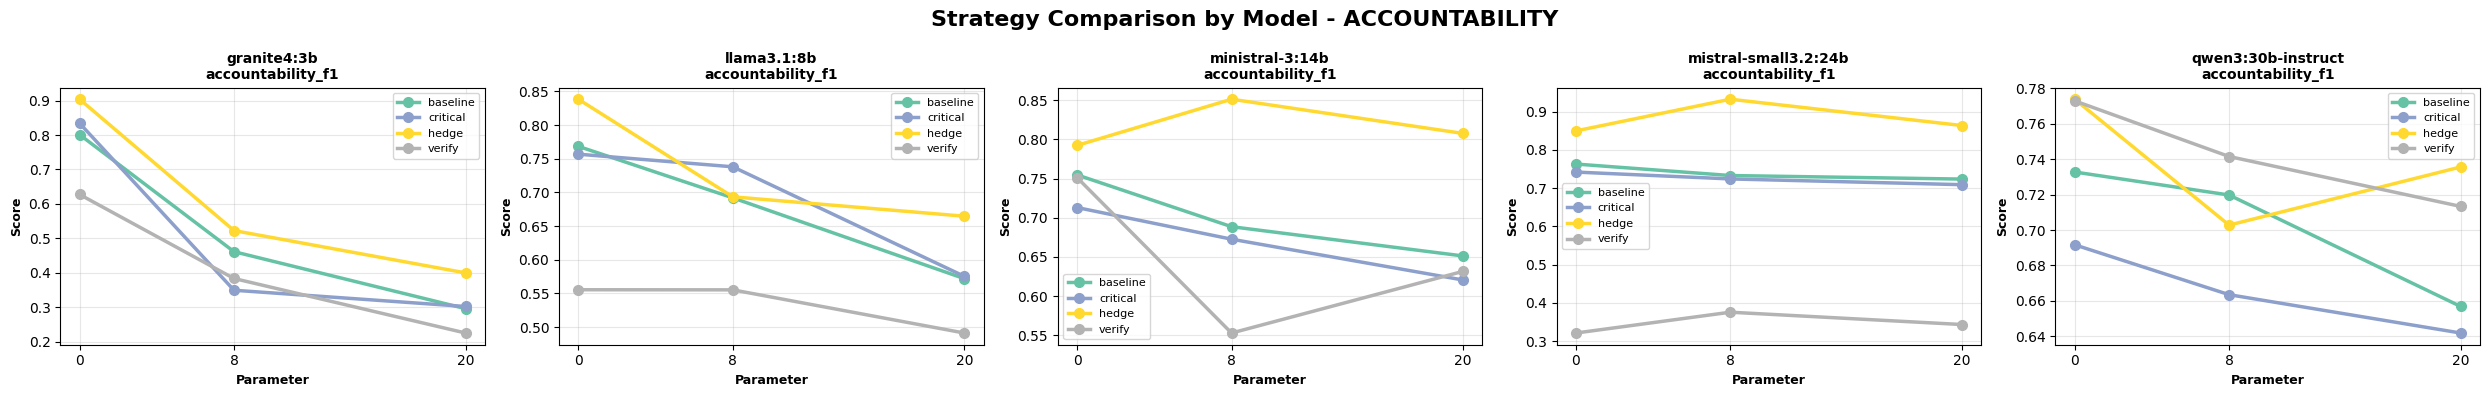

In [23]:
charts.plot_line_comparison(experiment_type='factuality')

charts.plot_line_comparison(experiment_type='robustness')

charts.plot_line_comparison(experiment_type='accountability')

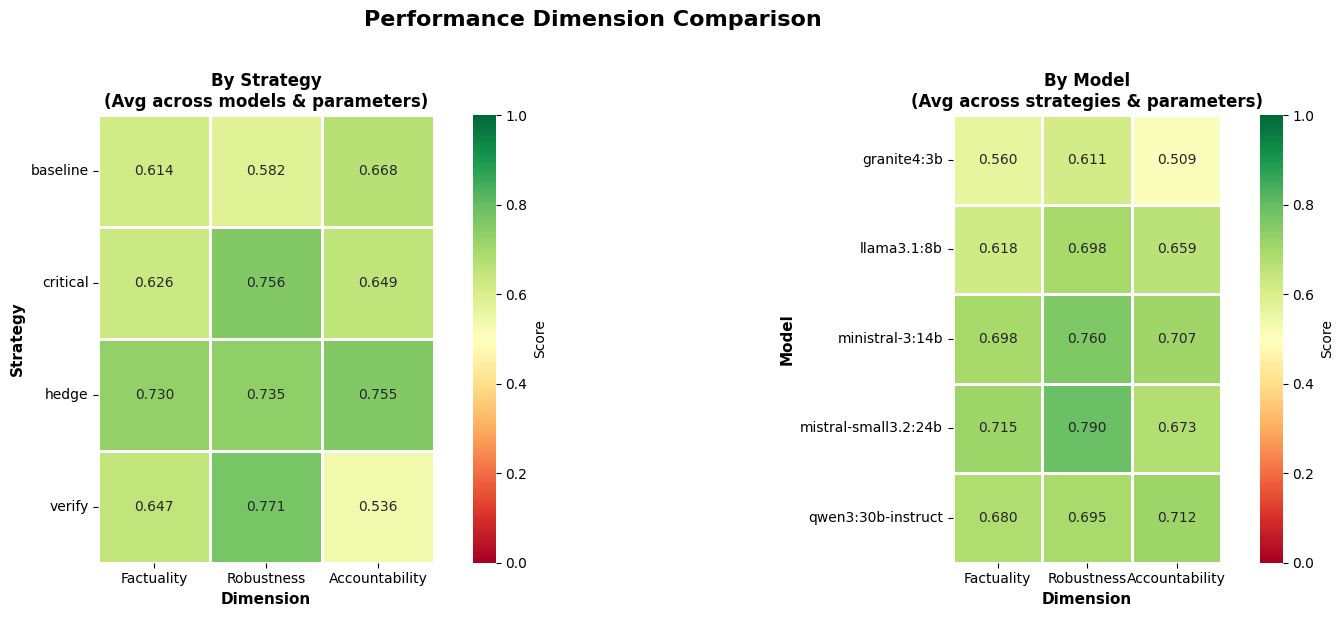

In [ ]:
charts.plot_dimension_comparison_combined()